In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from top2vec import Top2Vec

In /home/pwielopolski/anaconda3/envs/datascience/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/pwielopolski/anaconda3/envs/datascience/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/pwielopolski/anaconda3/envs/datascience/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/pwielopolski/anaconda3/envs/datascience/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be re

In [2]:
model = Top2Vec.load('results/models/content-model.bin')

In [3]:
model.hierarchical_topic_reduction(15)

[[22, 20, 54, 0],
 [16, 17, 19, 68, 32, 67, 46, 36, 47, 55, 56, 59, 61, 63, 6],
 [21, 27, 39, 41, 37, 3],
 [14, 60, 30, 58, 40, 66, 7],
 [28, 45, 12, 38, 65, 4],
 [5],
 [18, 35, 1],
 [43, 23, 57, 50, 64, 9],
 [53, 2],
 [34, 44, 11],
 [24, 25, 29, 51, 62, 15],
 [48, 52, 10],
 [8],
 [33, 13],
 [31, 42, 49, 26]]

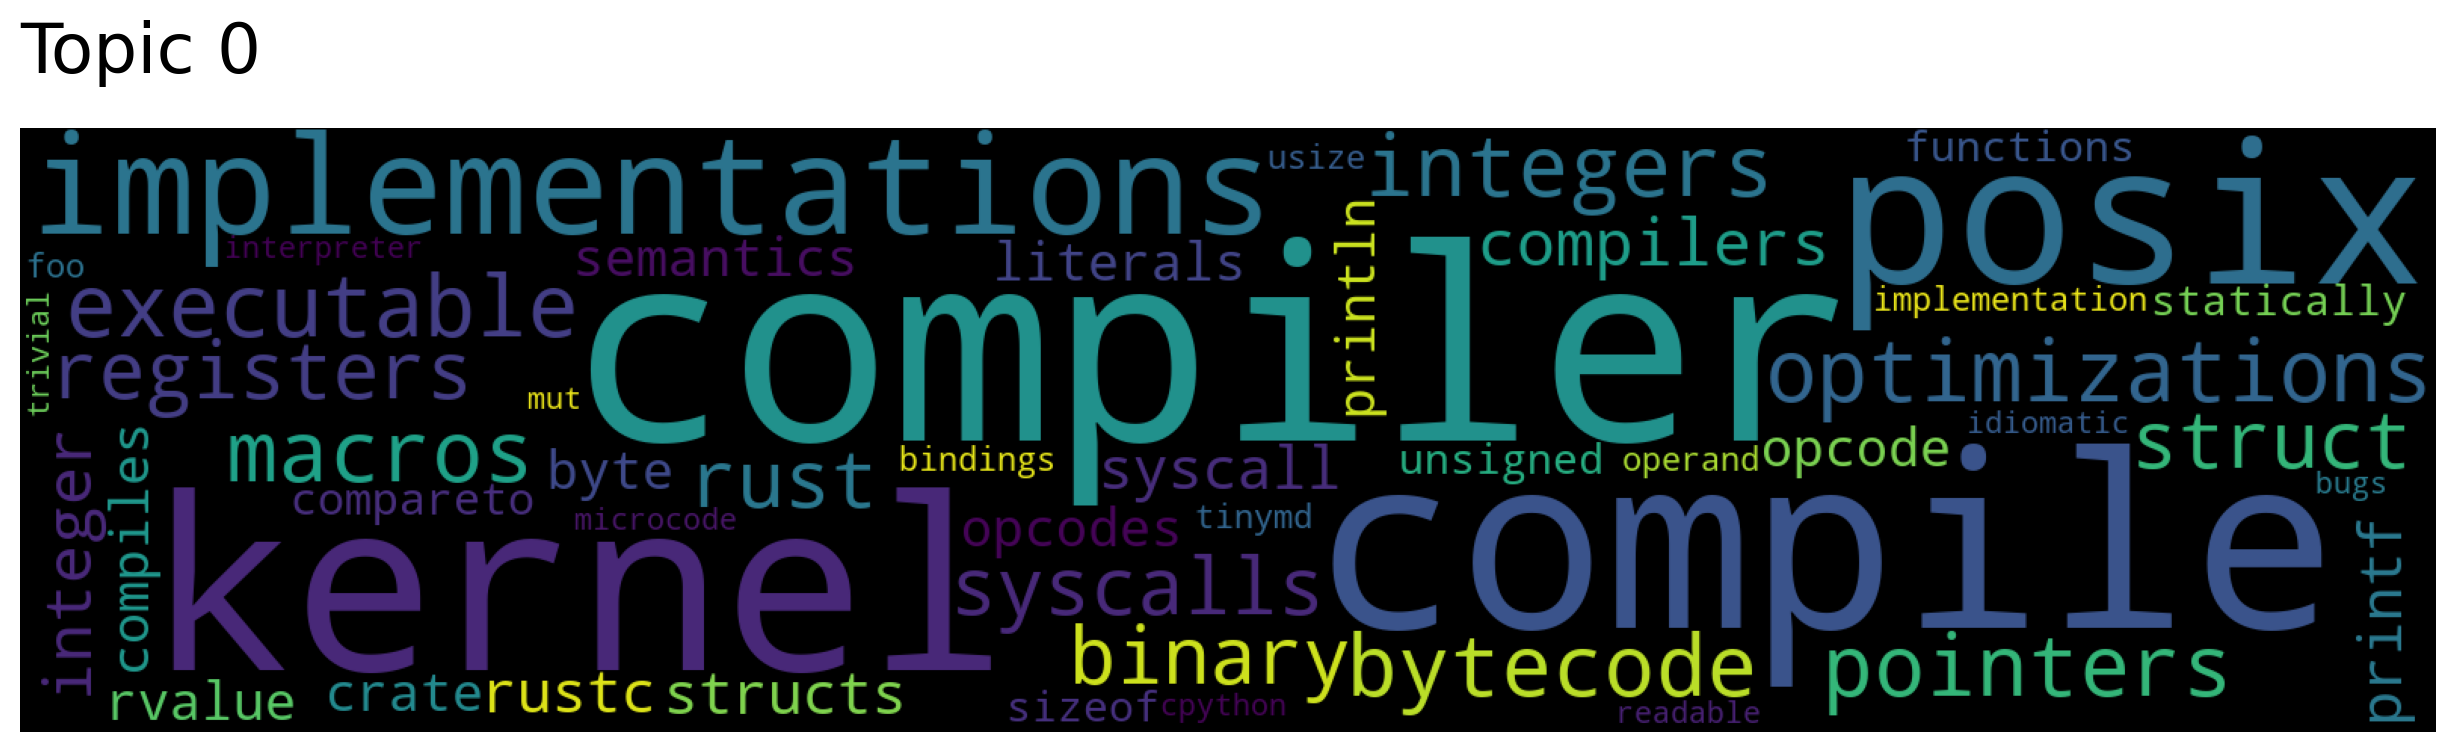

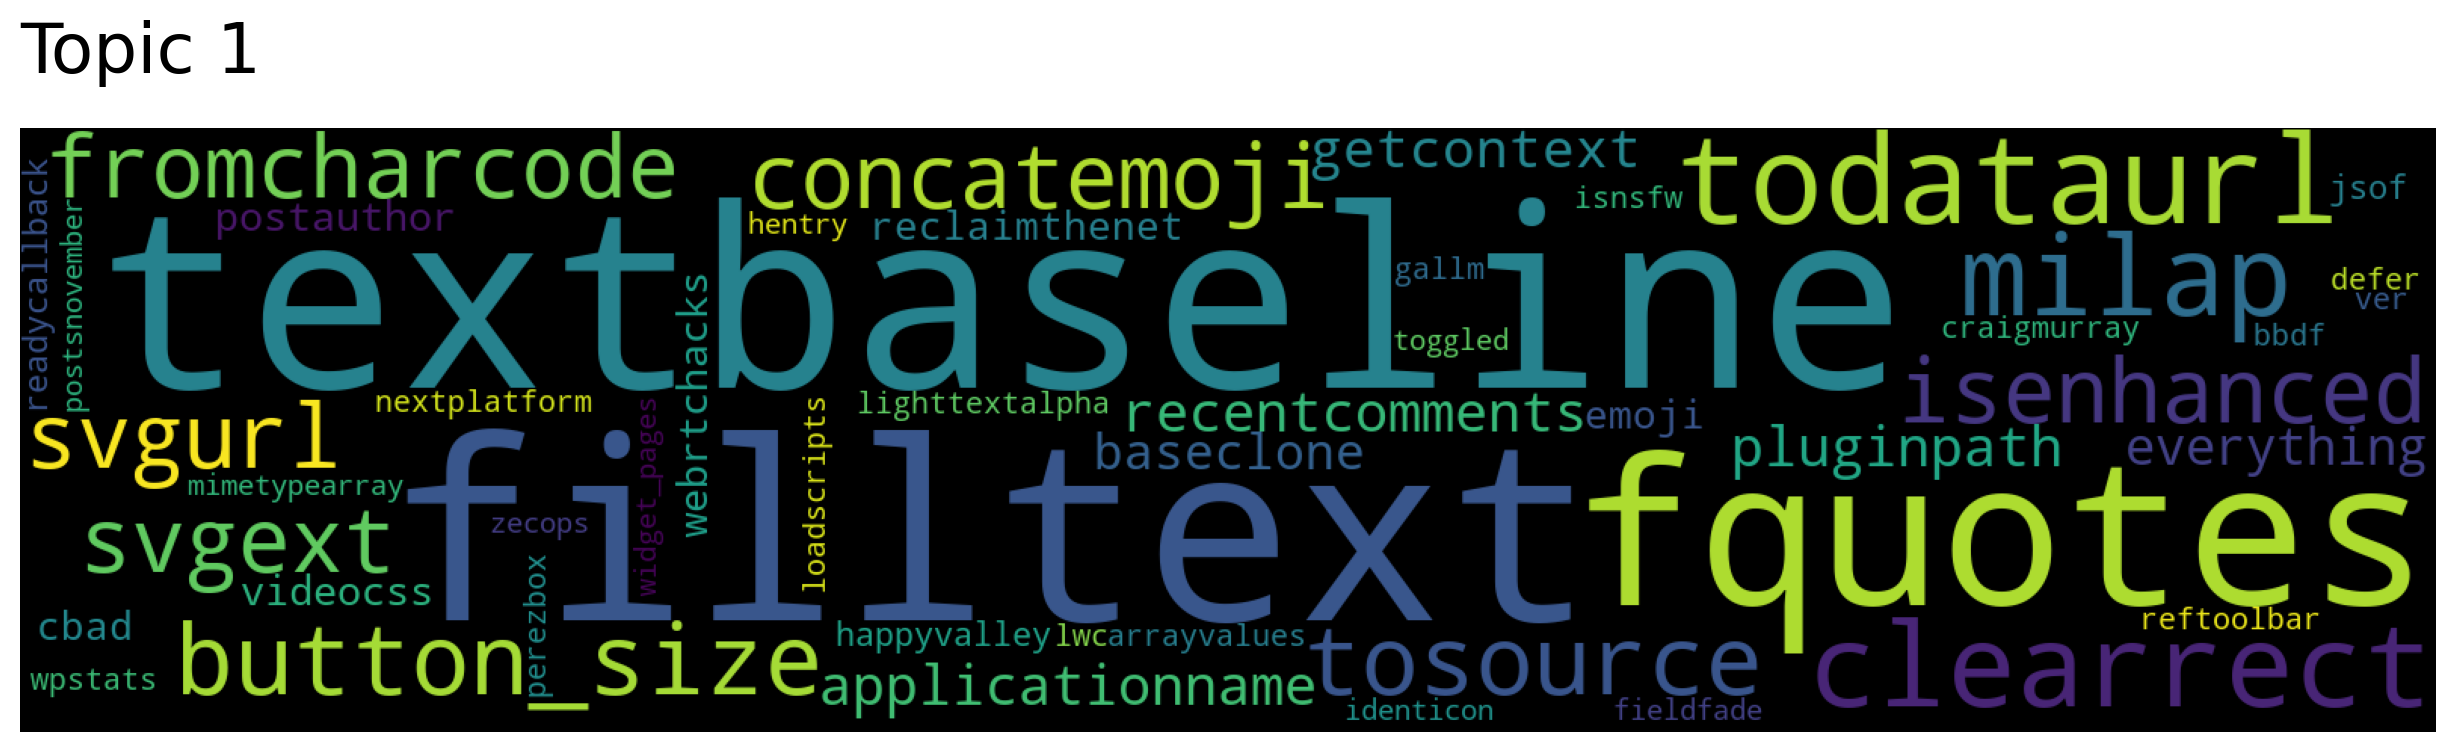

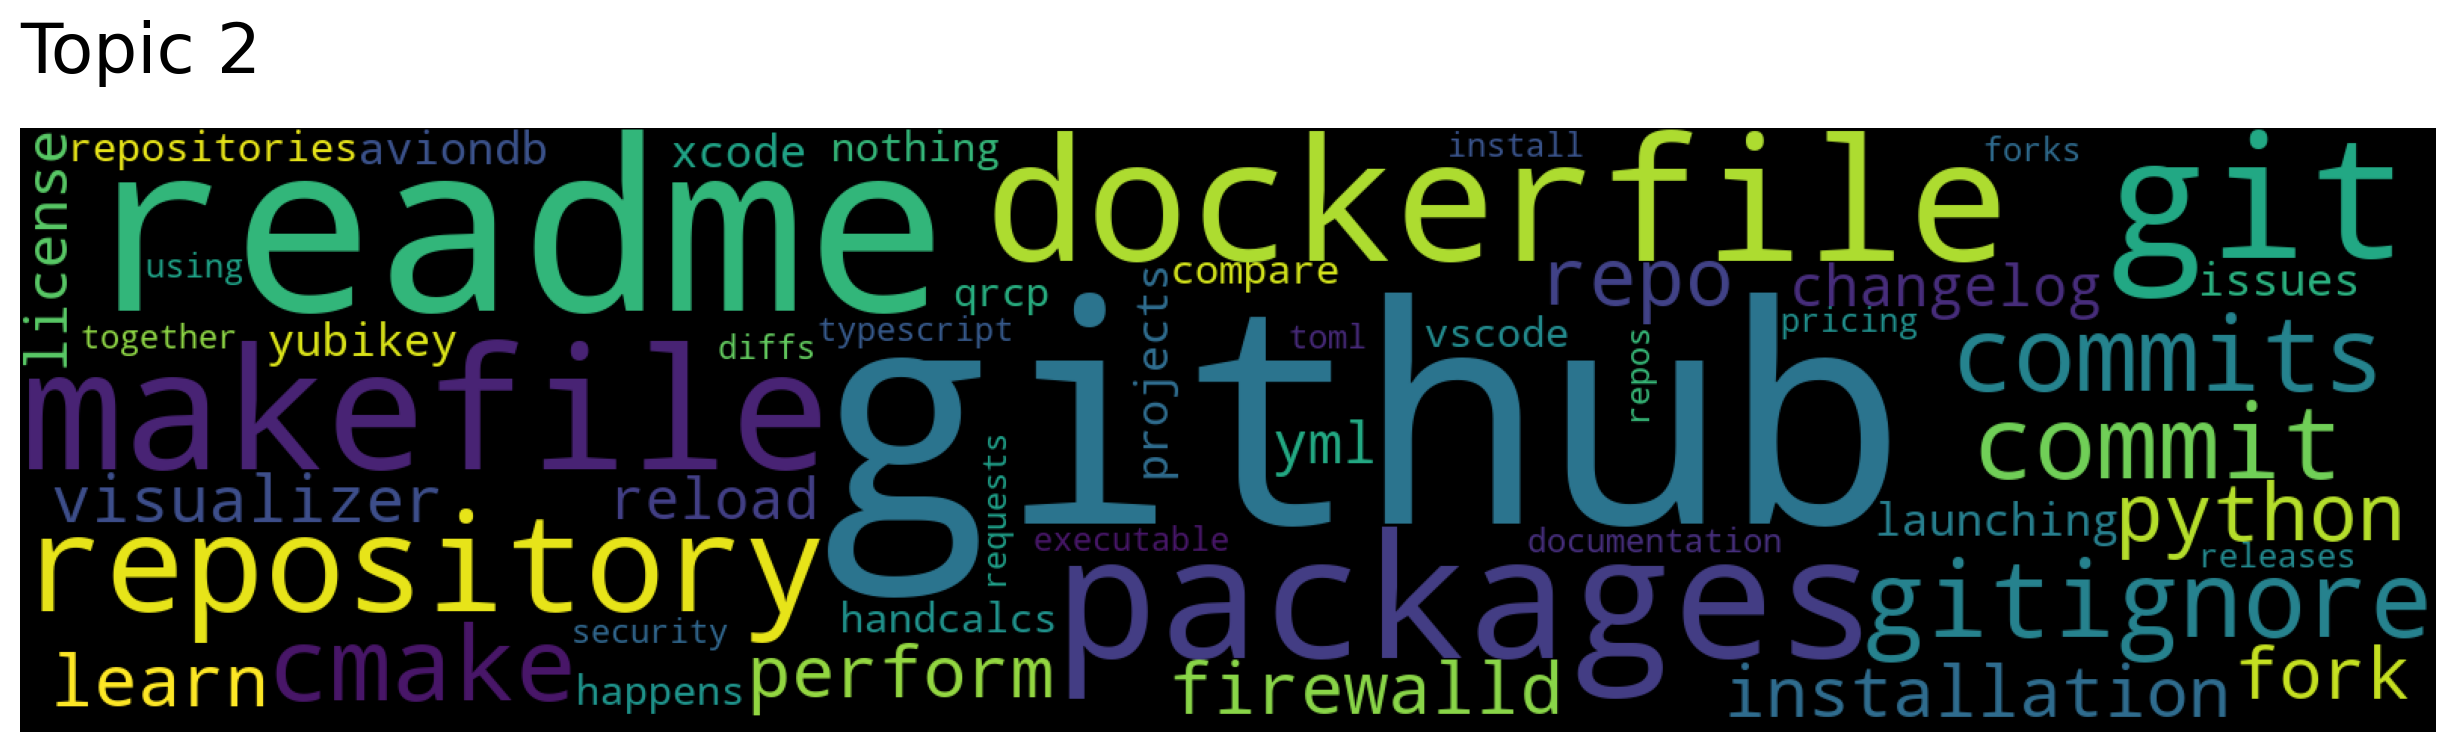

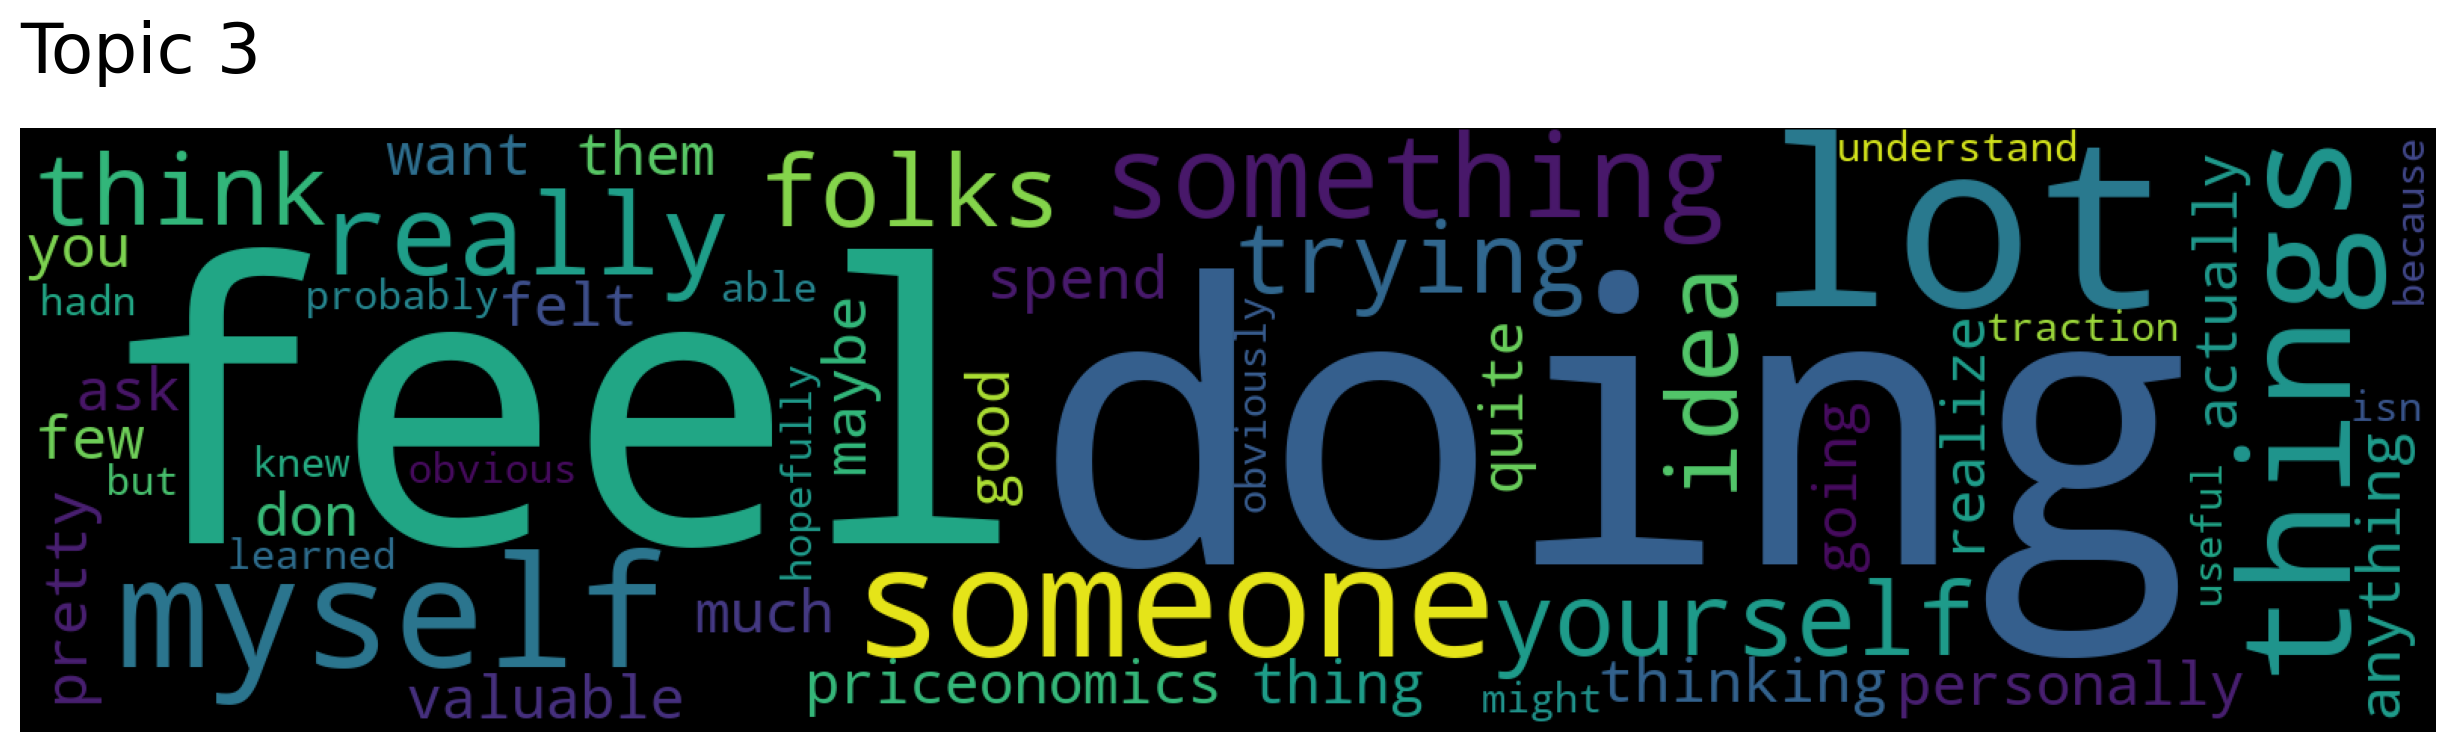

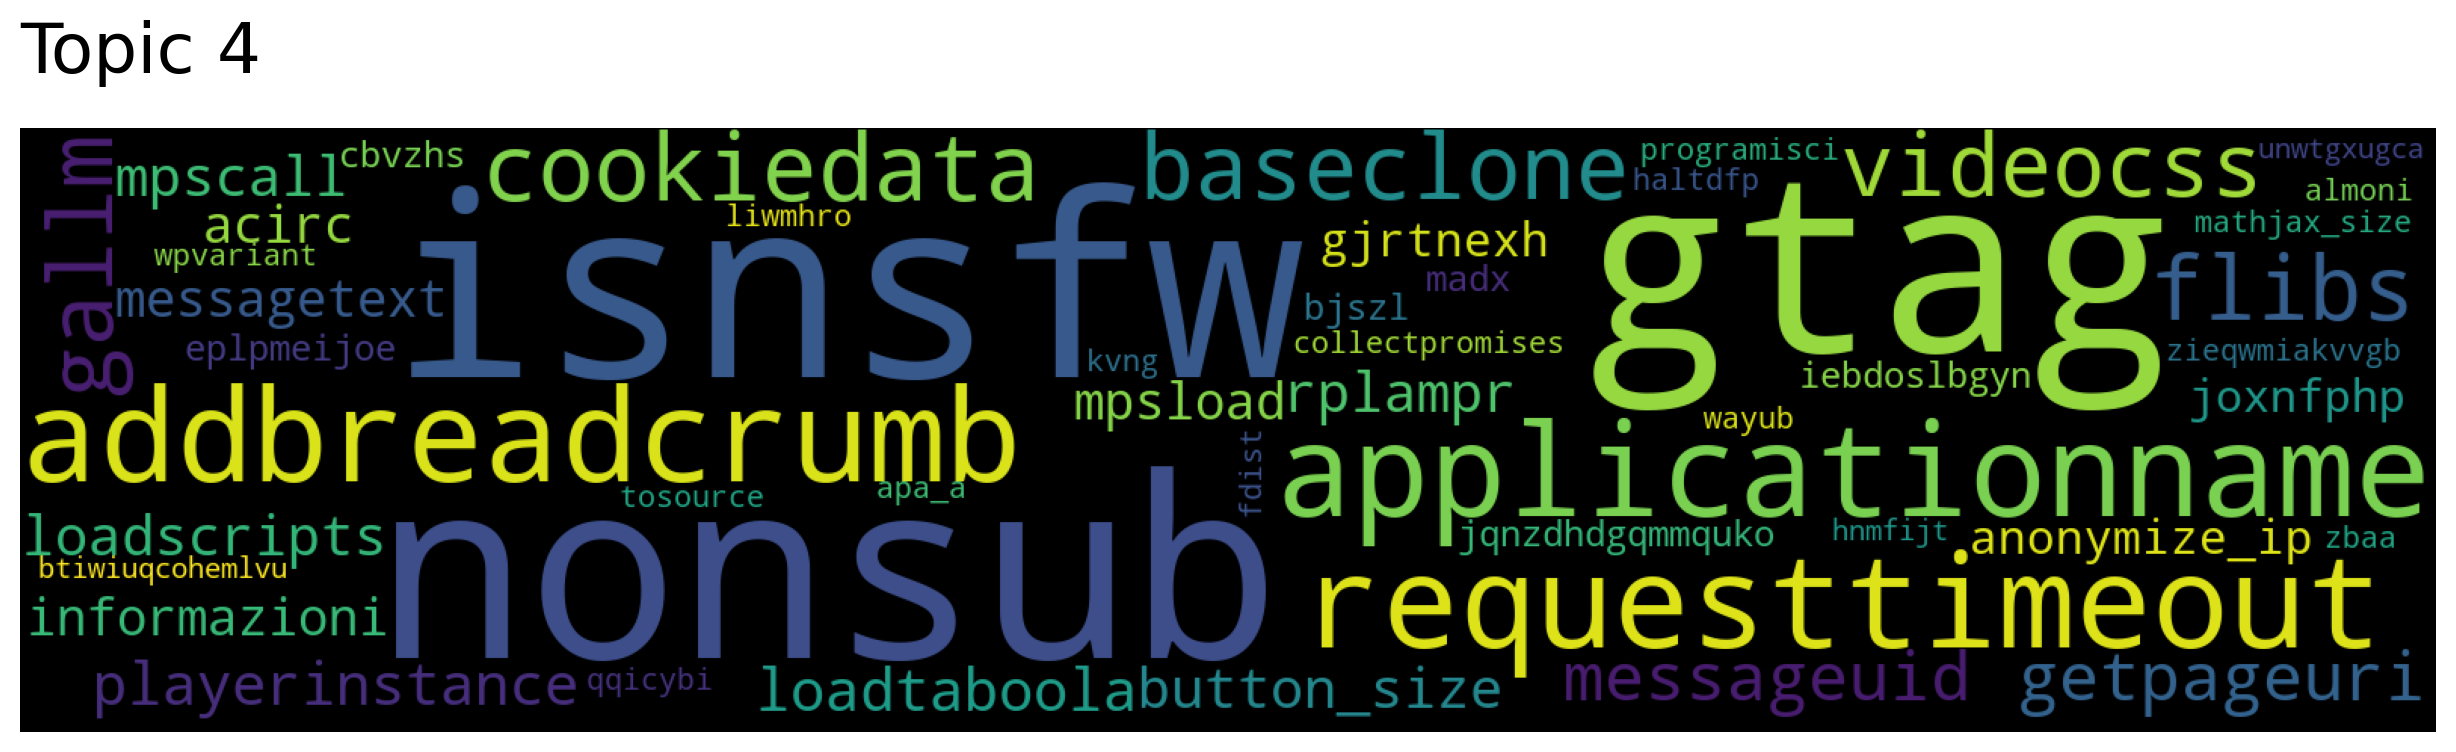

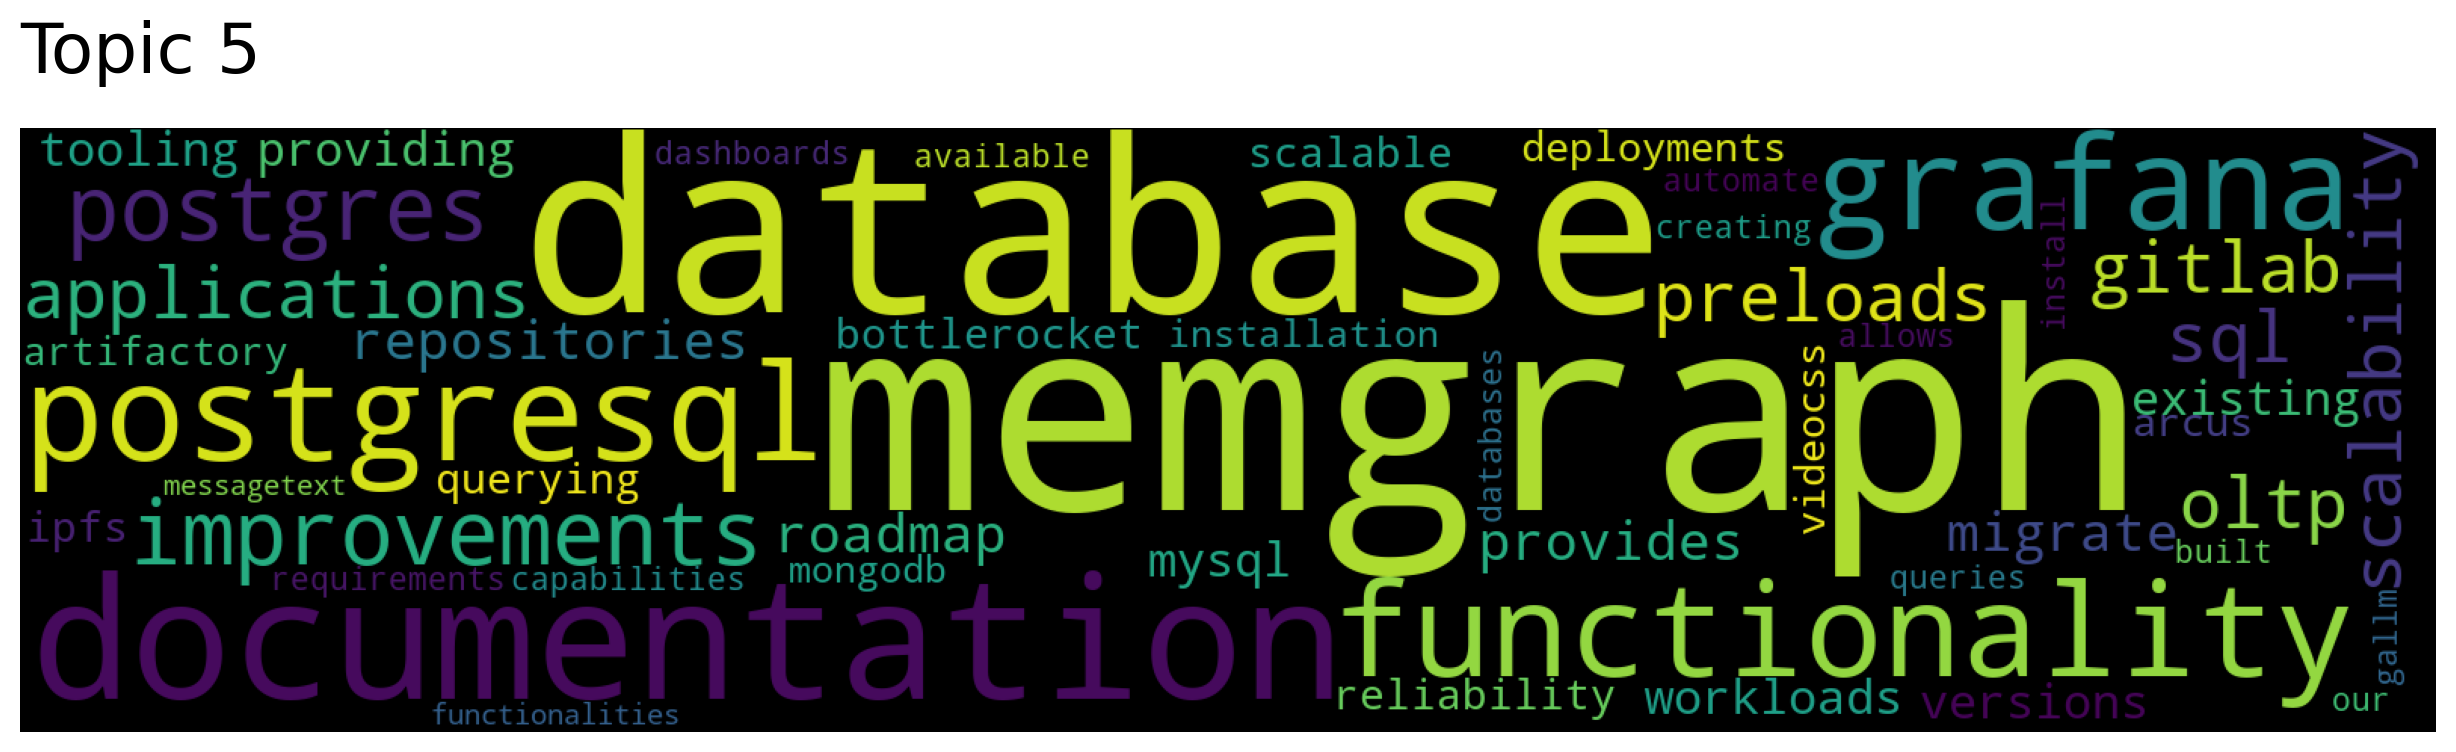

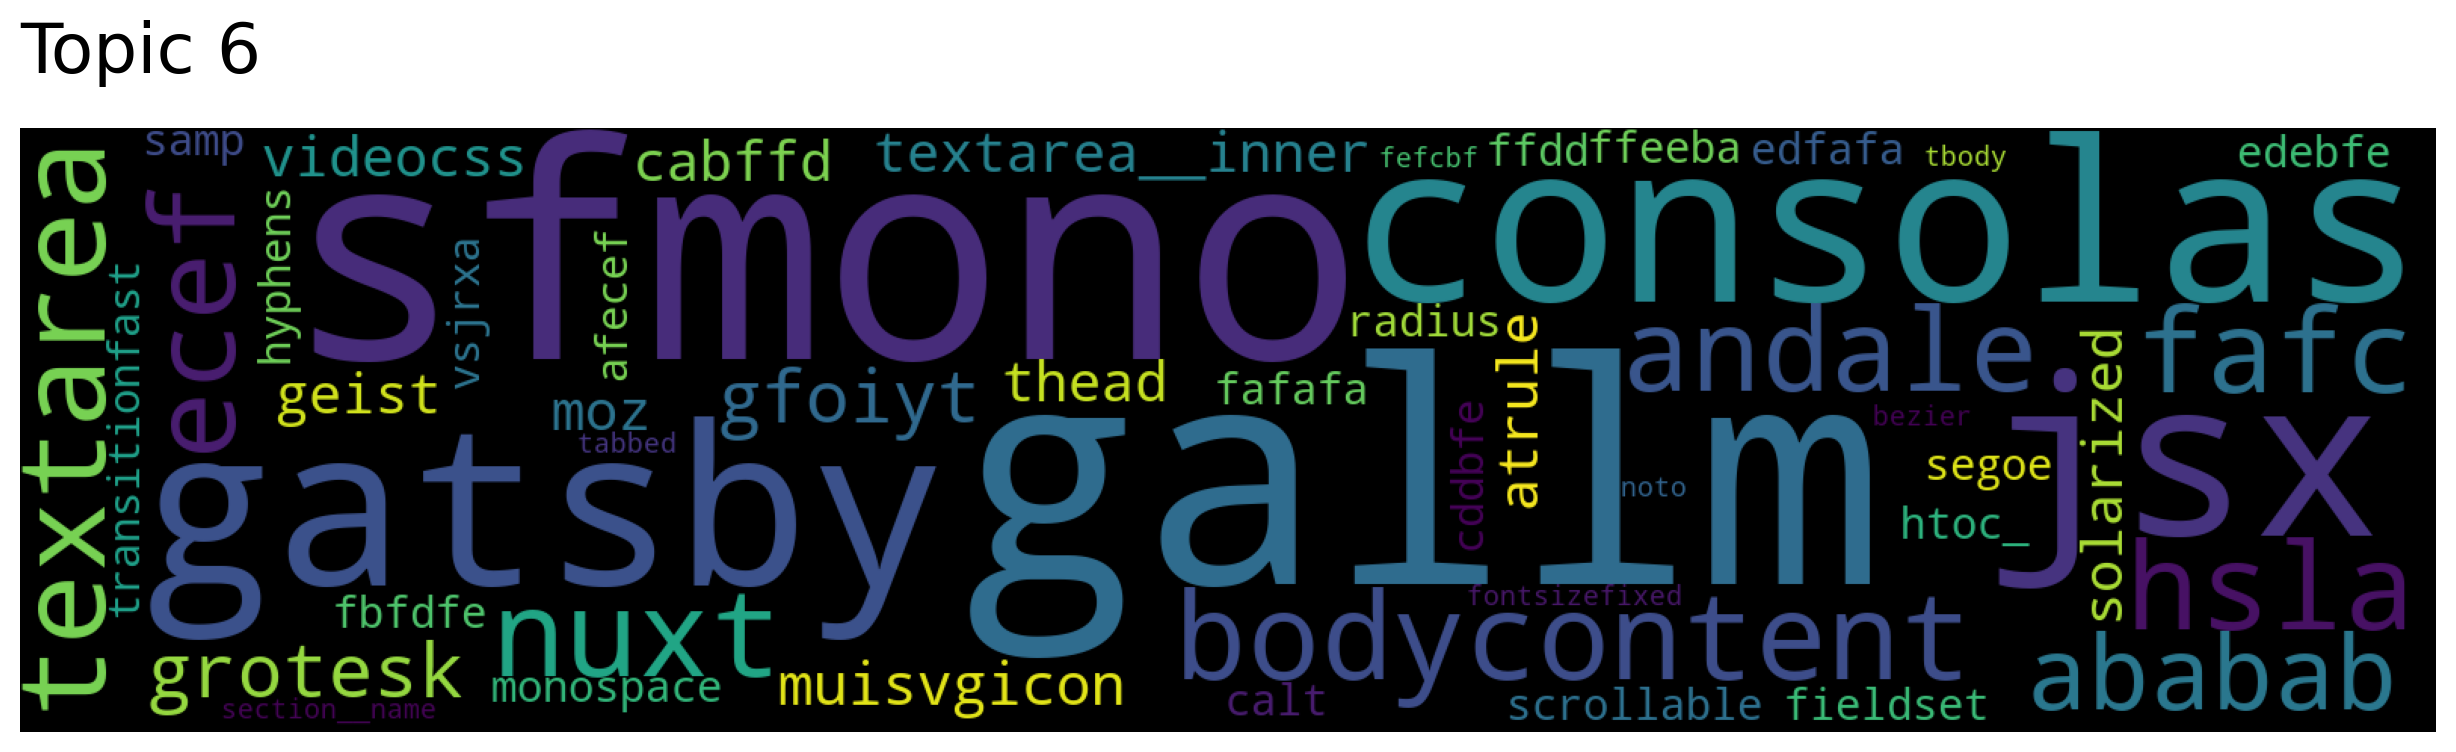

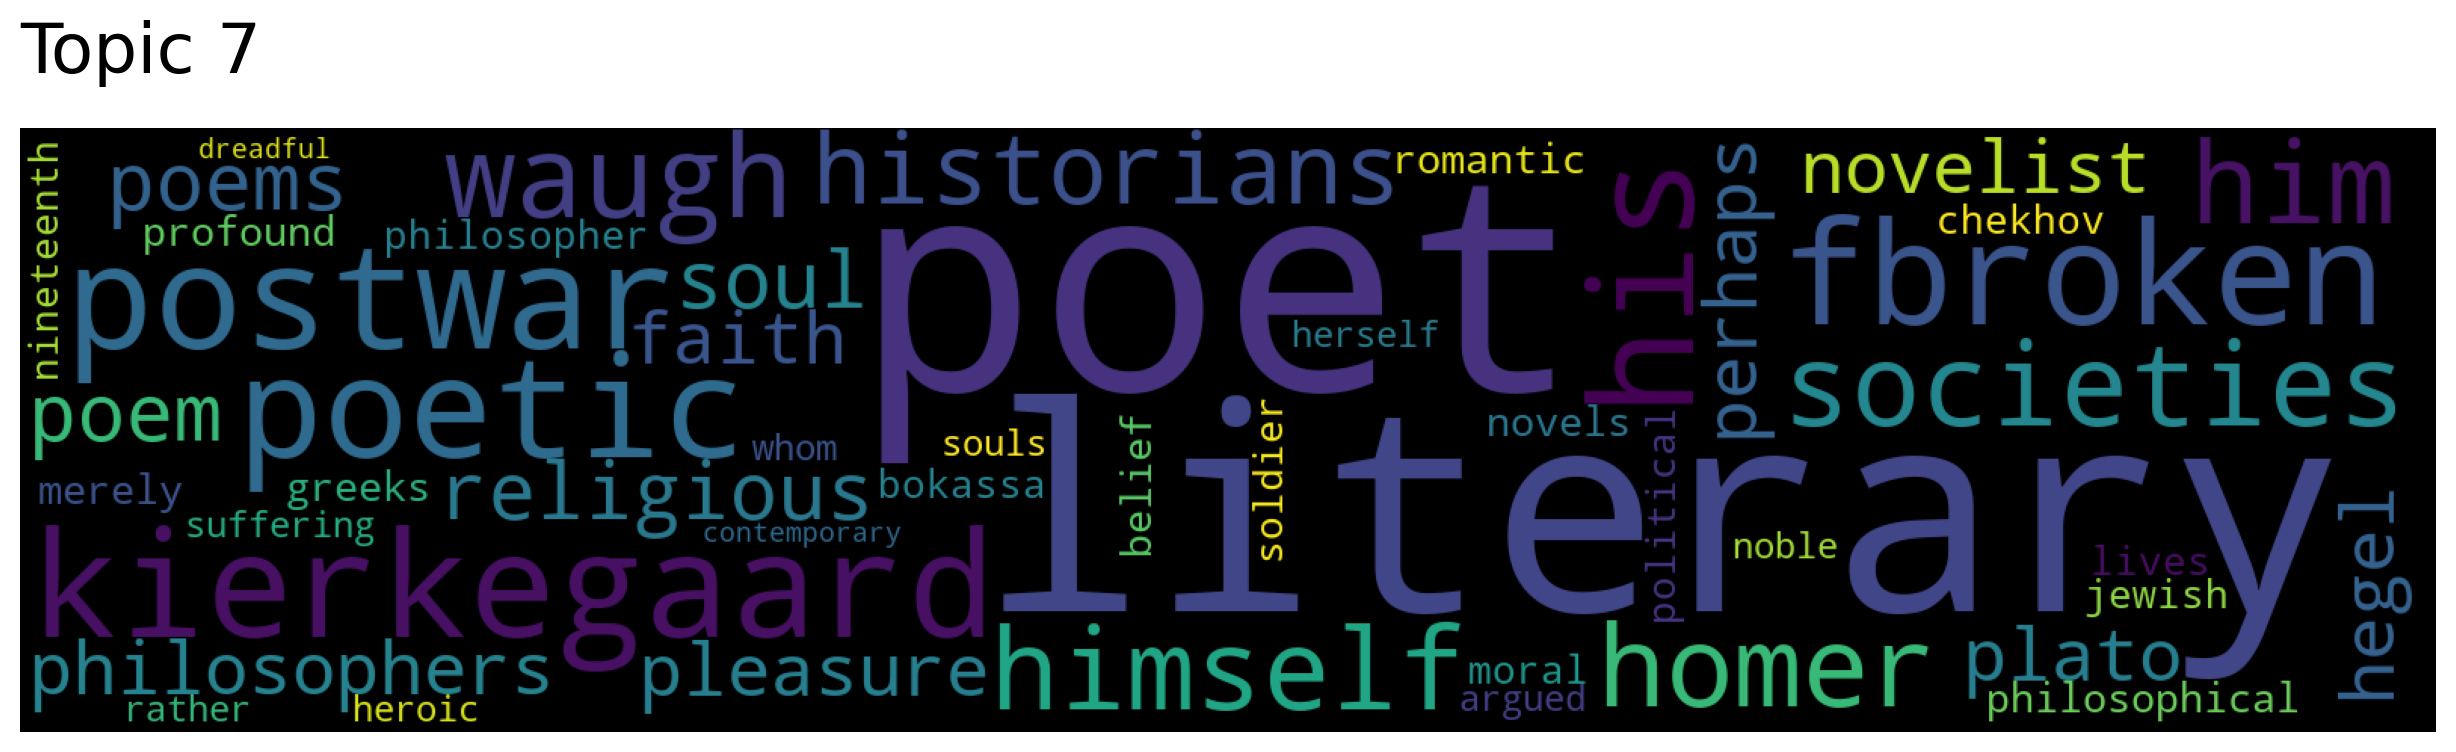

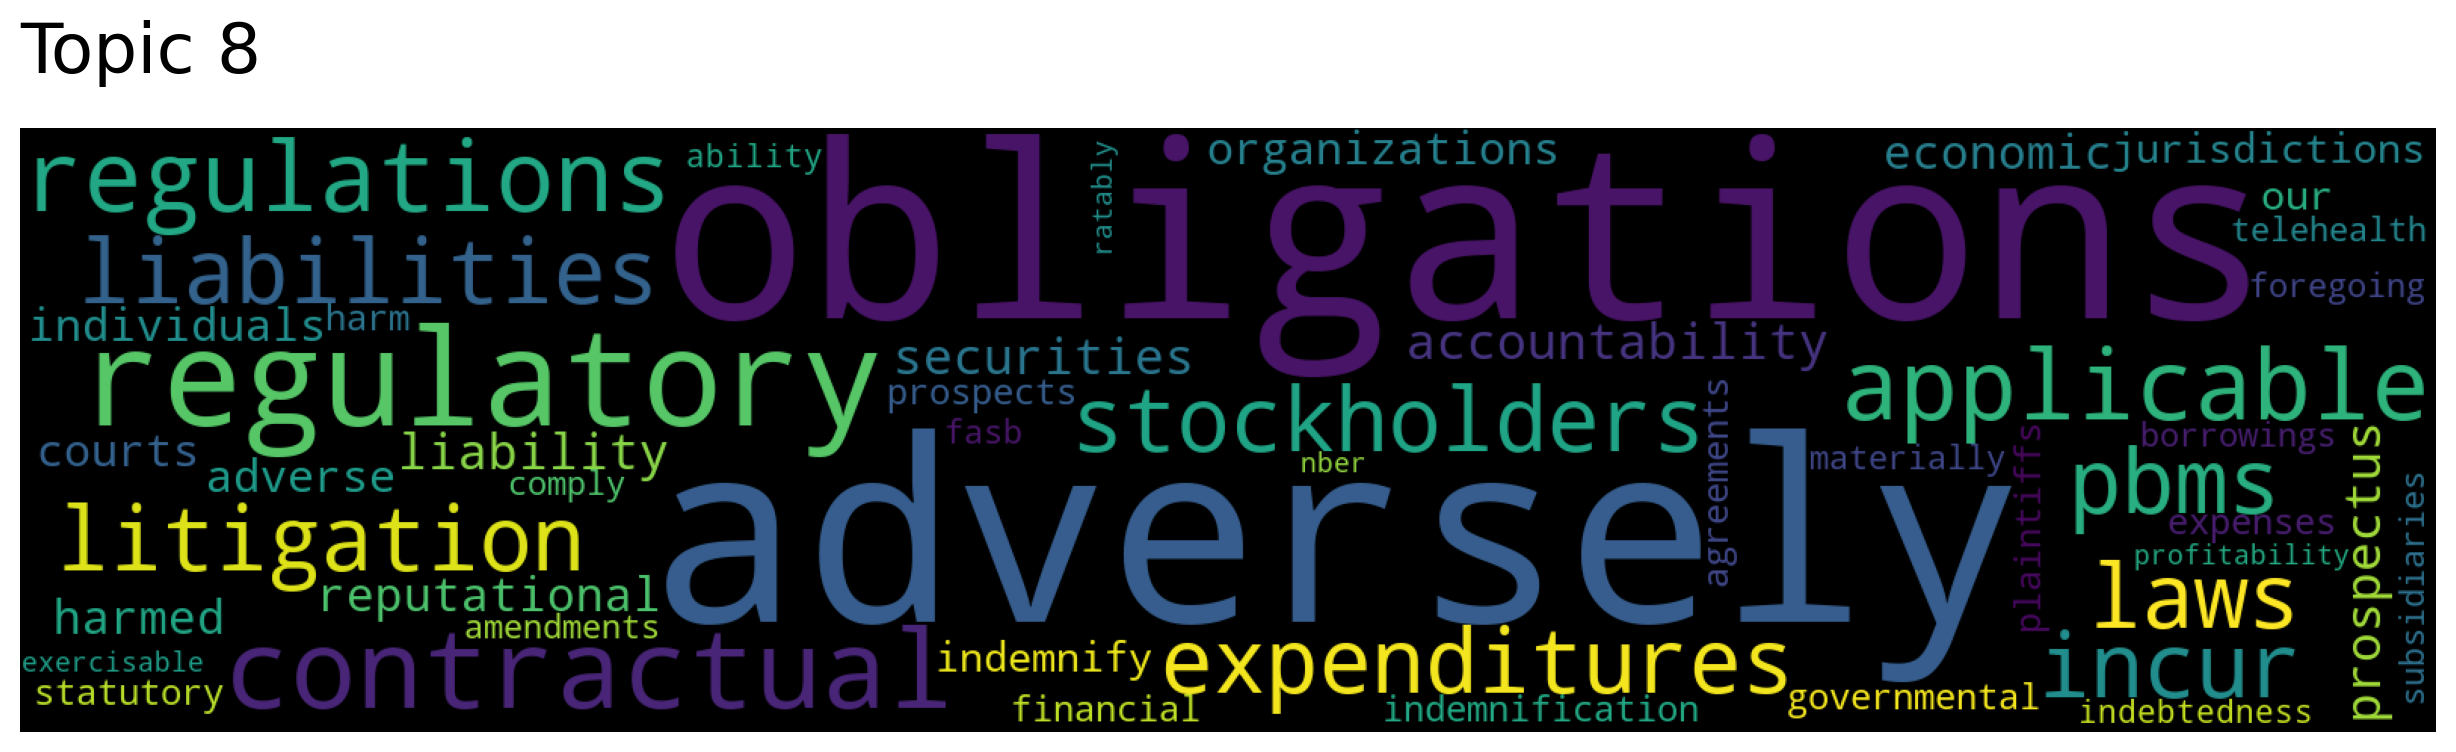

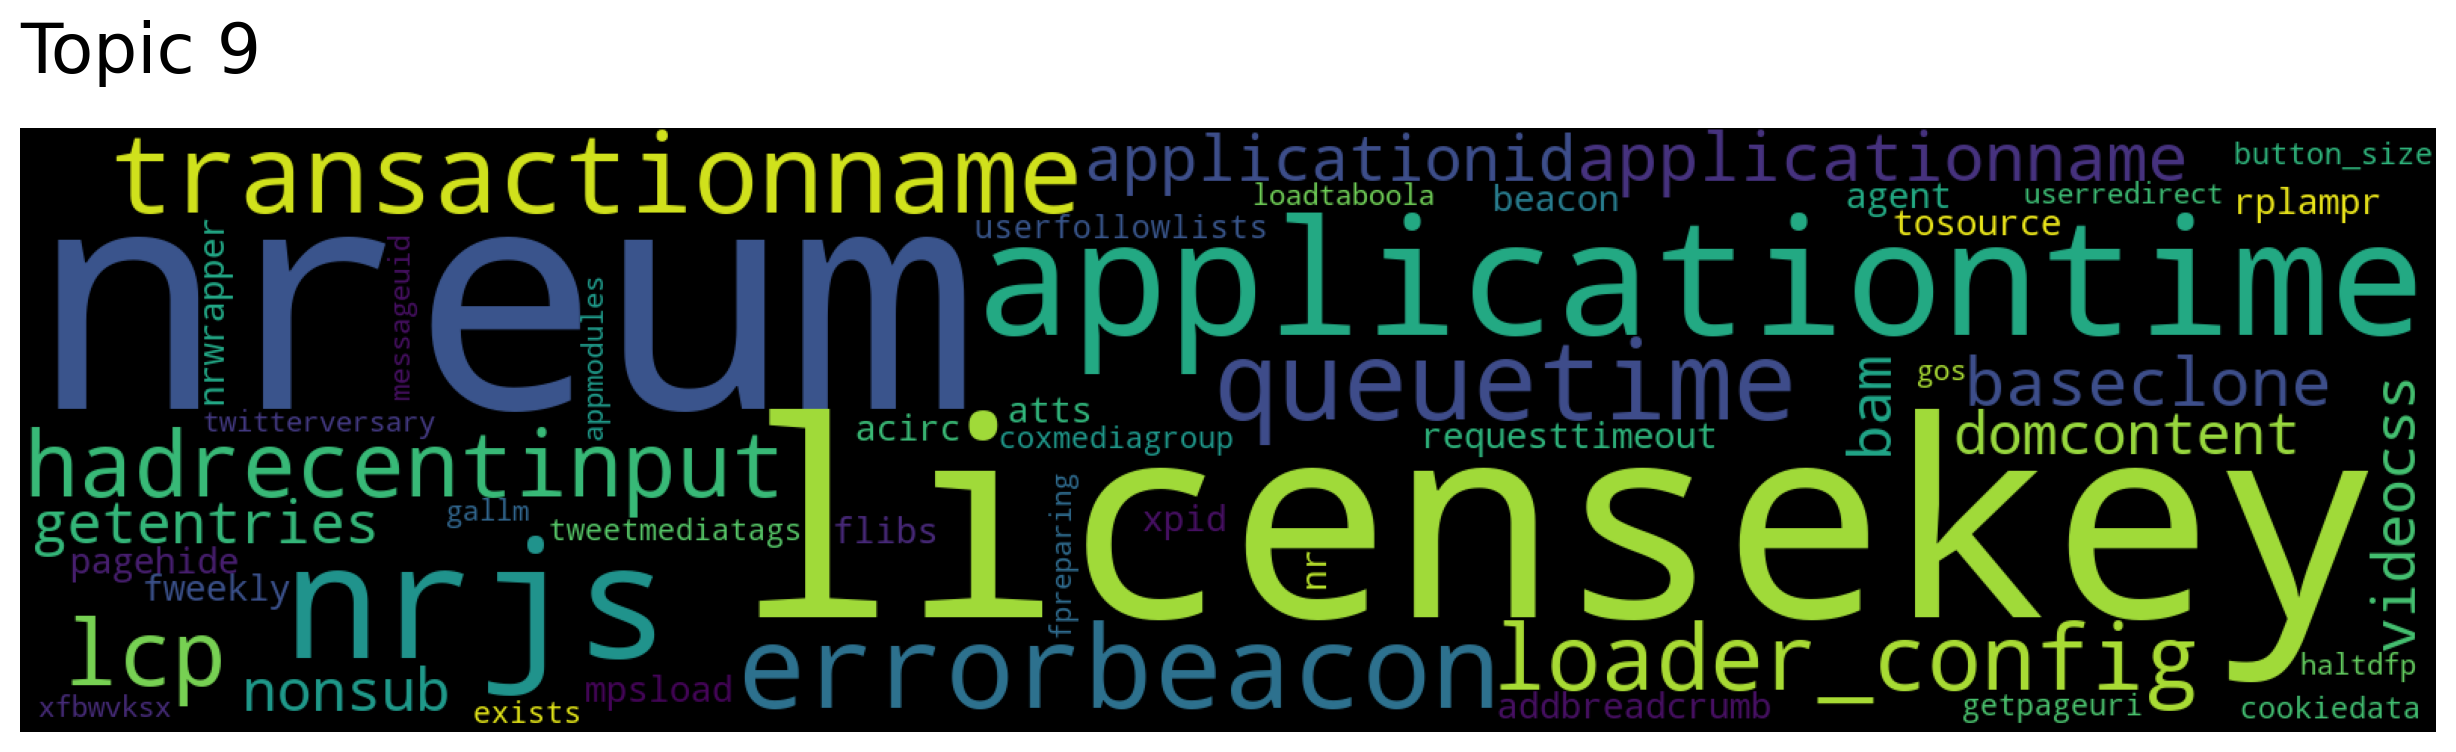

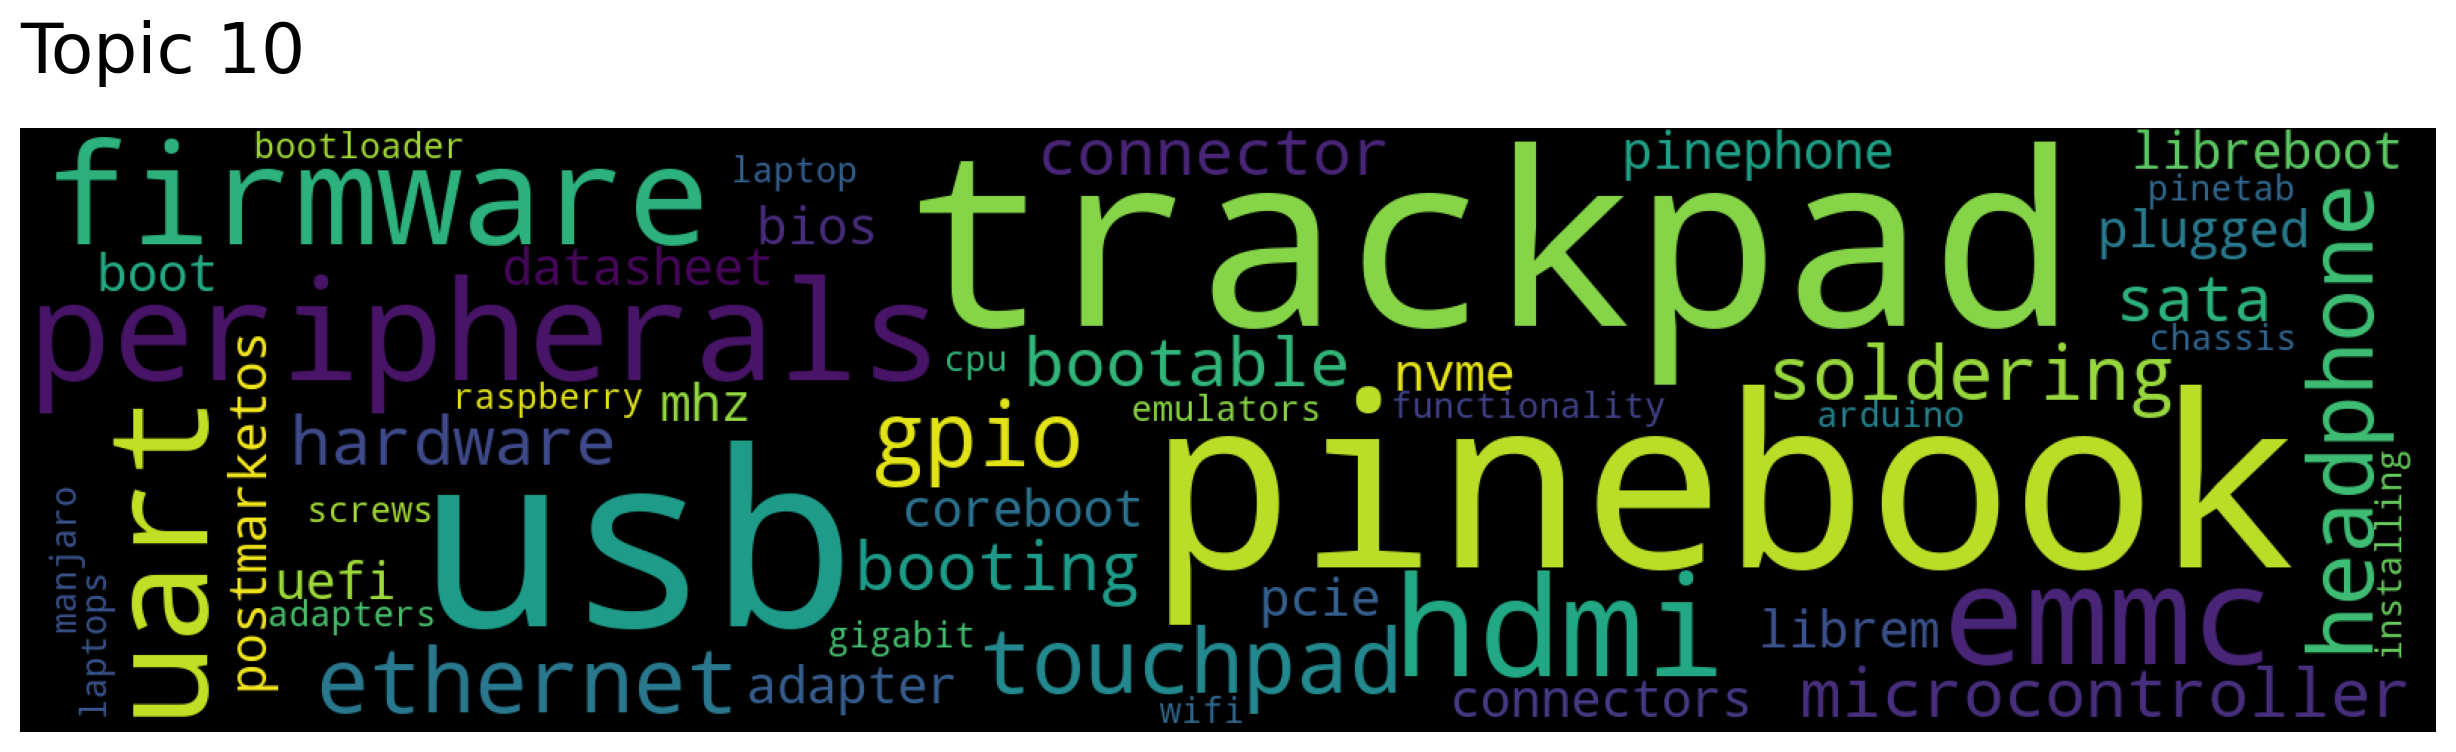

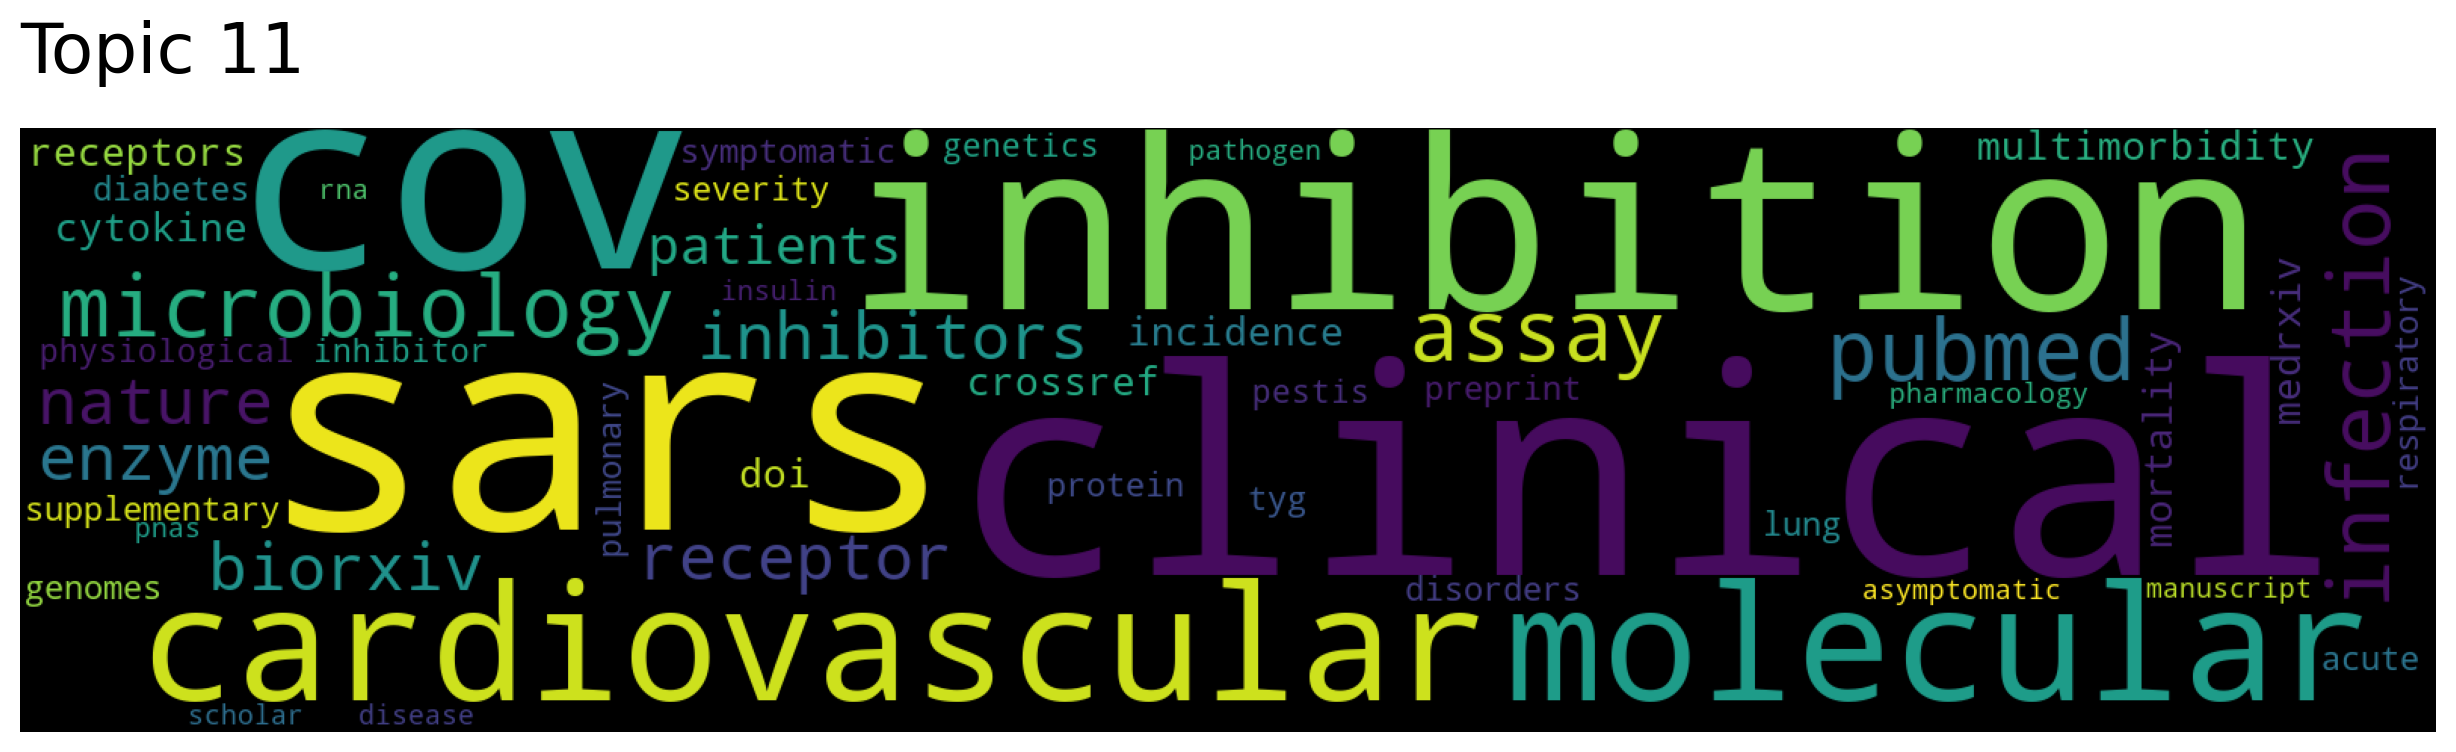

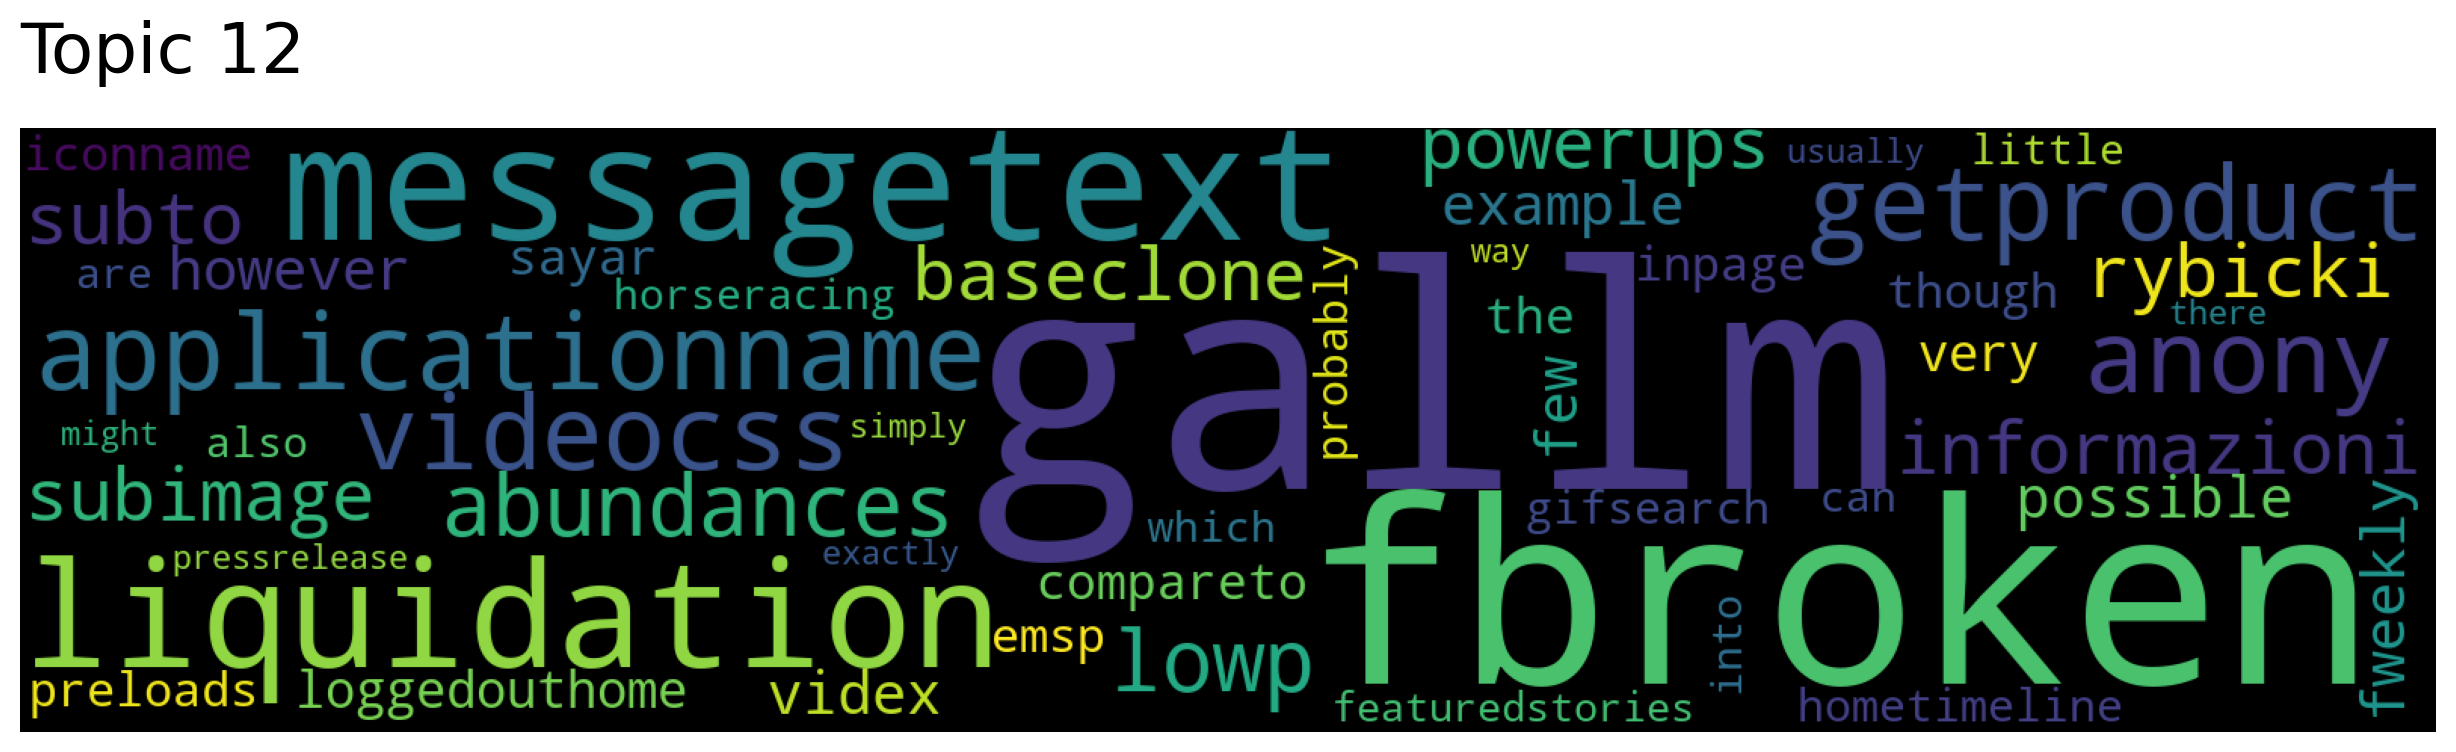

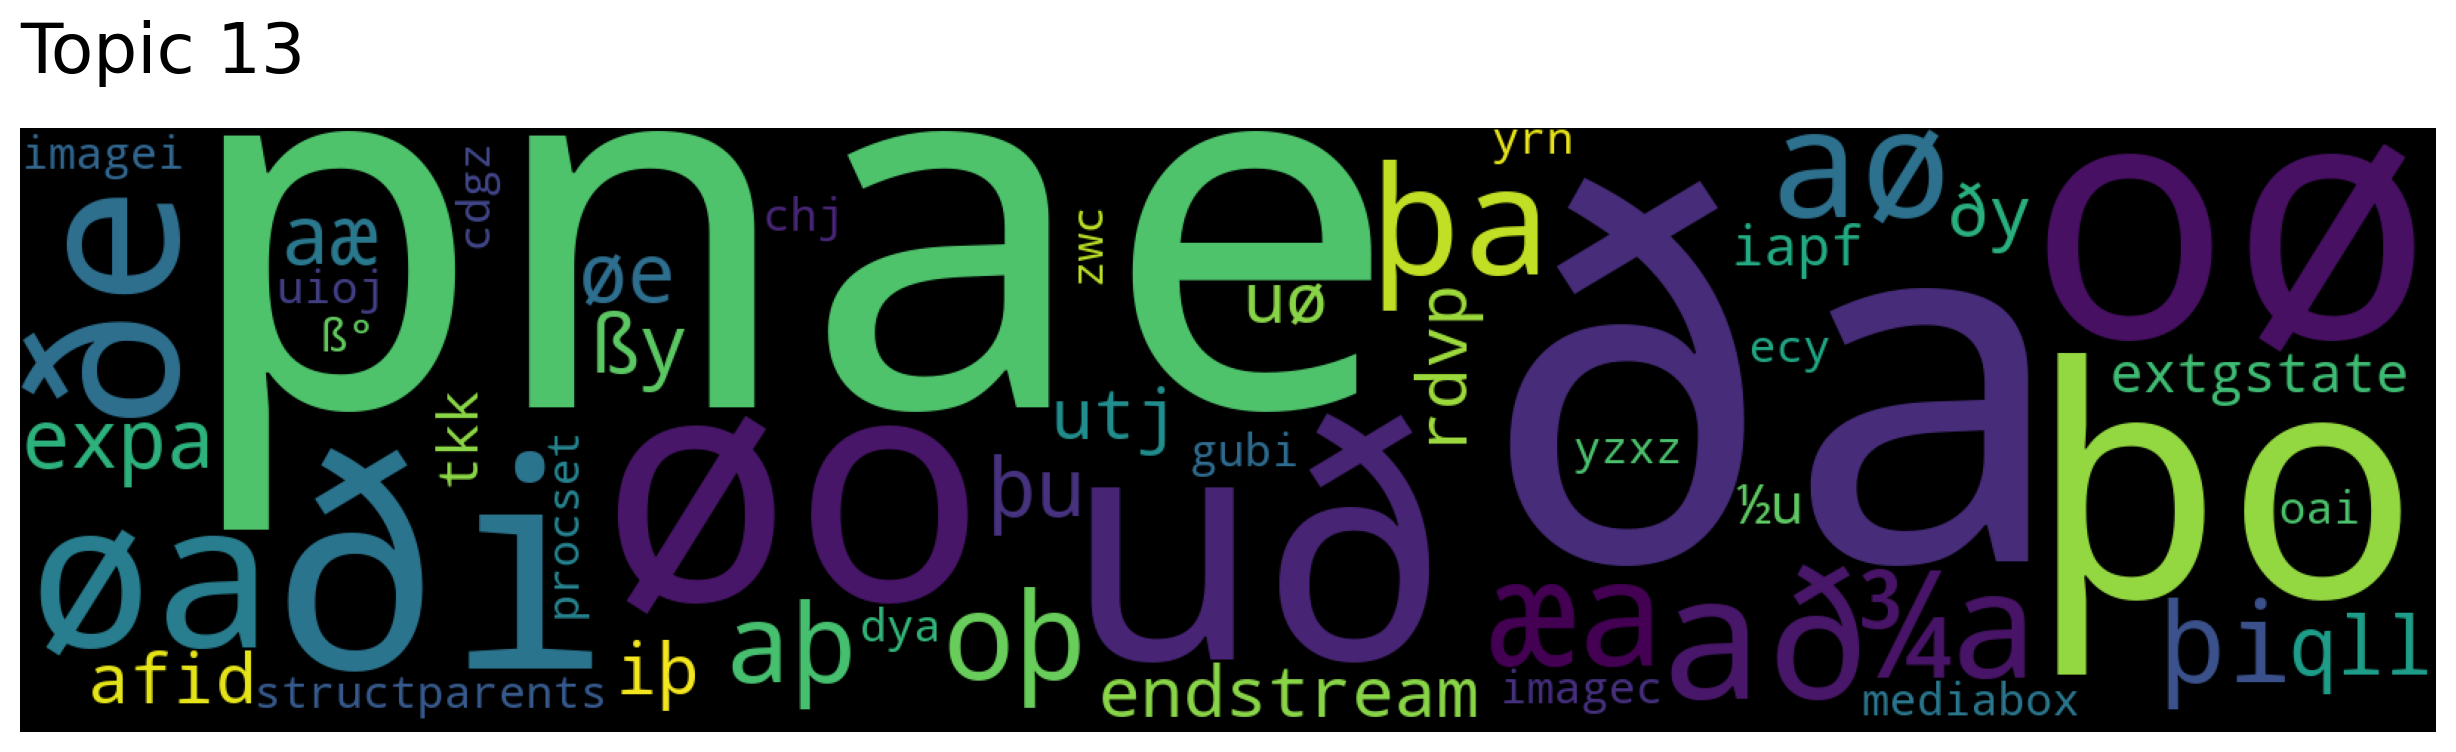

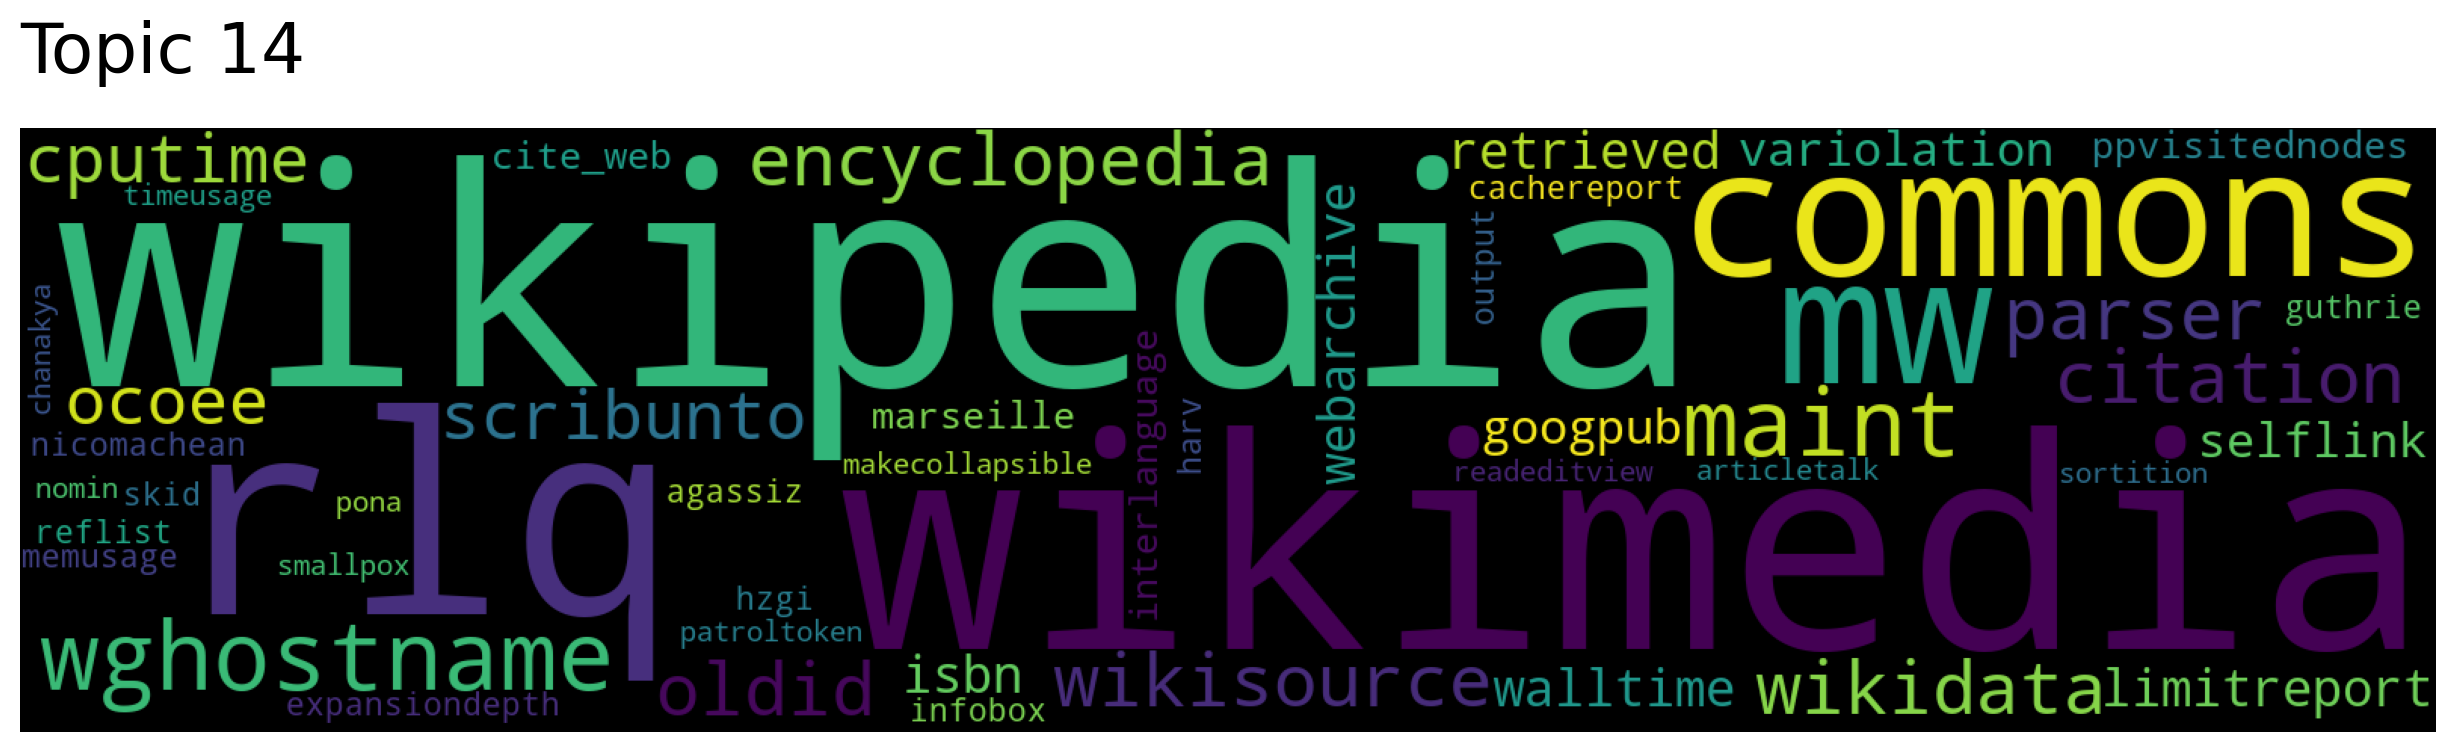

In [4]:
for i in range(model.get_num_topics(reduced=True)):
    model.generate_topic_wordcloud(i)
    plt.savefig(f'results/plots-reduced/{i}.png')

In [5]:
import plotly.graph_objects as go

from sklearn.decomposition import PCA

In [6]:
topic_vectors_pca = PCA(n_components=2).fit_transform(model.topic_vectors_reduced)
topic_words, word_scores, topic_nums = model.get_topics(reduced=True)

In [7]:
customdata = ['<br>'.join(el[:10]) for el in topic_words]

hovertemplate_label = "<b>Topic: %{text}</b><br>"
hovertemplate_papers = 'Words:<br>%{customdata}'
hovertemplate_extra = "<extra></extra>"
hovertemplate = hovertemplate_label + hovertemplate_papers + hovertemplate_extra

data = go.Scatter(
    x = topic_vectors_pca[:, 0],
    y = topic_vectors_pca[:, 1],
    text = topic_nums,
    hovertemplate = hovertemplate,
    customdata = customdata,
    mode = 'markers'
)

fig = go.Figure(
    data = data,
    layout = go.Layout(
        title='Hacker News topics',
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        plot_bgcolor='rgba(0,0,0,0)',
        showlegend=False
    )
)

fig.write_html('results/hacker-news-topics.html')